# Predictia Preturilor de telefoane in functie de componente

Acest proiect are ca scop aplicarea tehnicilor de învățare automată pentru clasificarea prețurilor telefoanelor mobile. Setul de date utilizat conține caracteristici specifice dispozitivelor mobile, precum capacitatea bateriei, dimensiunea memoriei RAM, specificații hardware și alte detalii tehnice. Prin analiza acestor date, vom dezvolta modele predictive care vor determina în ce categorie de preț se încadrează un telefon.

Pentru a respecta cerințele, se vor utiliza metode de reducere a dimensionalității pentru preprocesarea datelor și mai multe algoritmi de învățare automată. Performanța modelelor va fi evaluată atât pe setul de date original, cât și pe cel redus dimensional, iar rezultatele vor fi analizate folosind grafice și tabele pentru a evidenția eficiența fiecărei metode.

# Biblioteci

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
import sklearn.metrics as metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import seaborn as sns

# Citire date + afisarea acestora


In [ ]:
df = pd.read_csv('/content/trainPrice.csv')
df.shape
df.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [ ]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [ ]:
df.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


# Distributia datelor

## Distibutia componentelor in functie de pret range

In [ ]:
cat_features=list()
num_features=list()
for column_name in df.columns:
    unique_values = len(df[column_name].unique())
    if unique_values<30:
      cat_features.append(column_name)
    else:
      num_features.append(column_name)

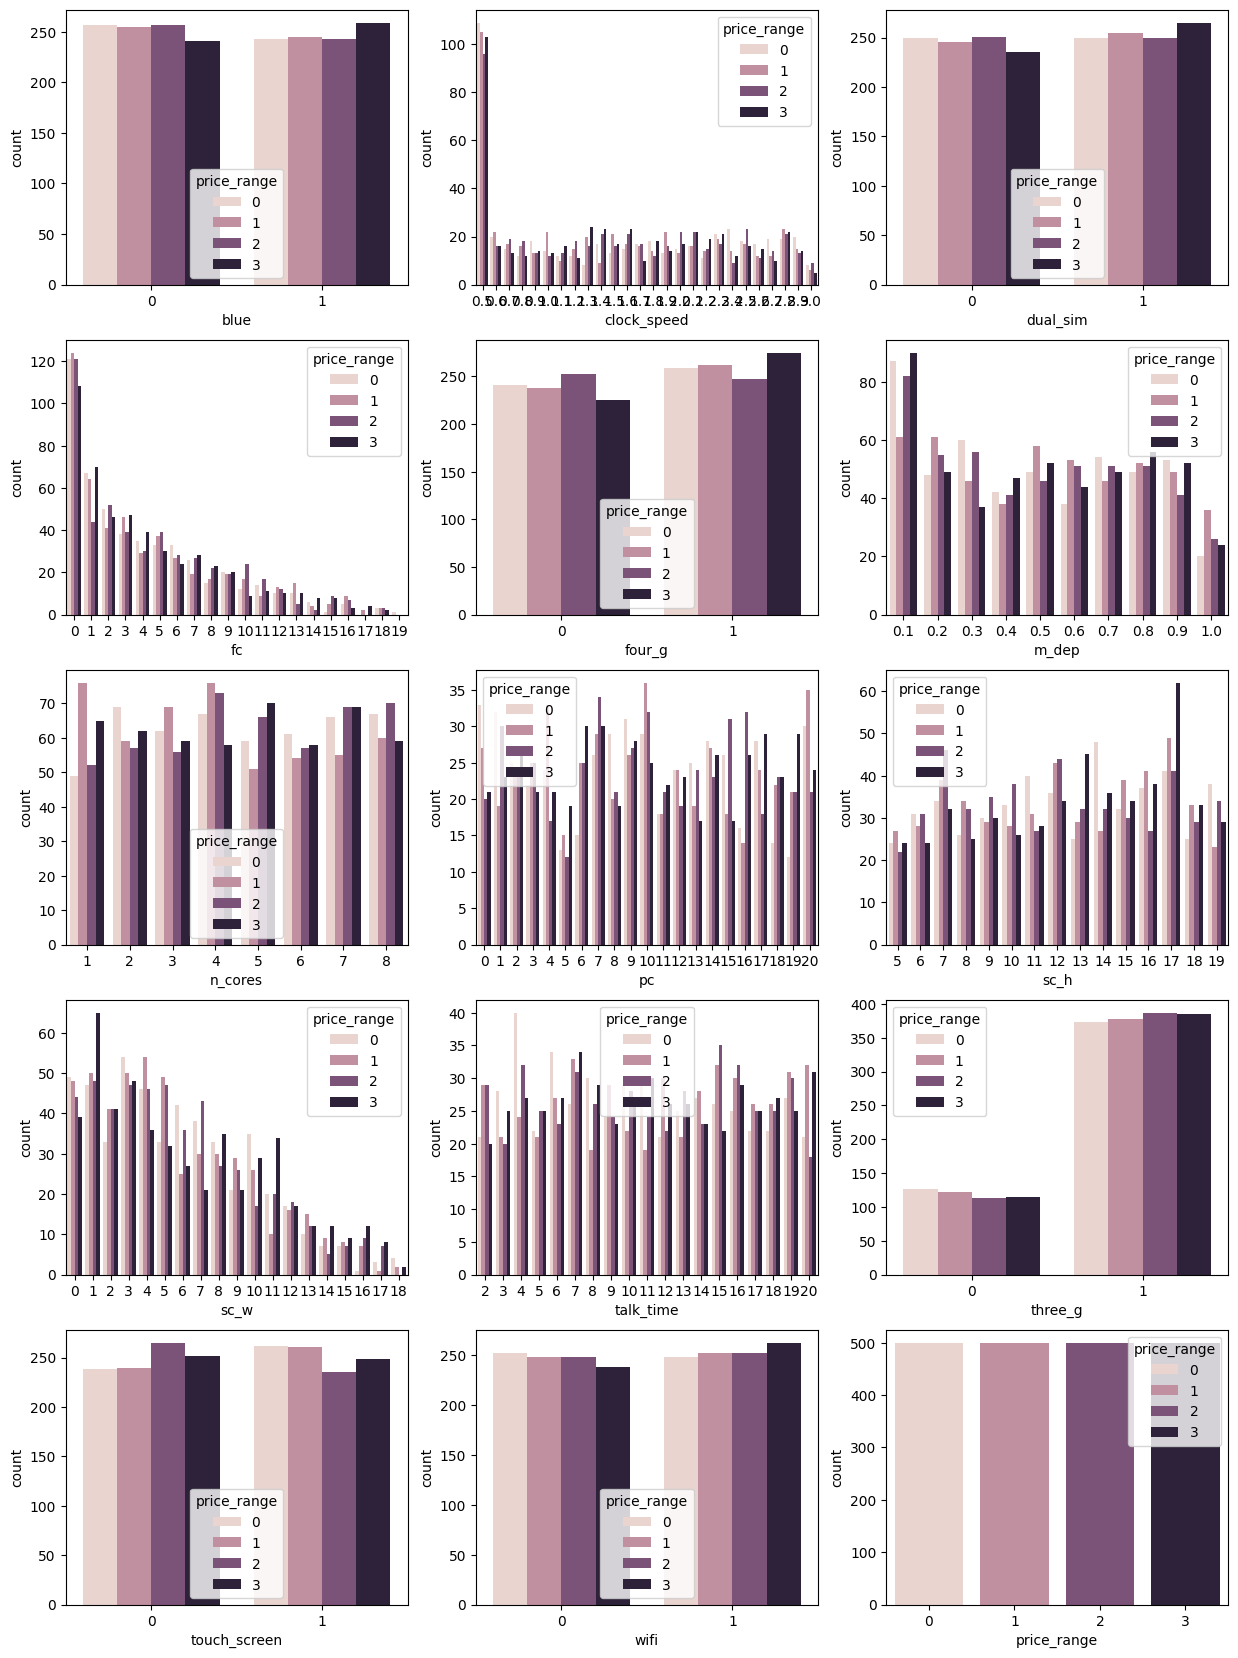

In [ ]:
i = 1
plt.figure(figsize = (15,25))
for feature in cat_features:
    plt.subplot(6,3,i)
    sns.countplot(x = feature , data = df,hue='price_range')
    i +=1

## Distributia componentelor in functie de densitatea acestora

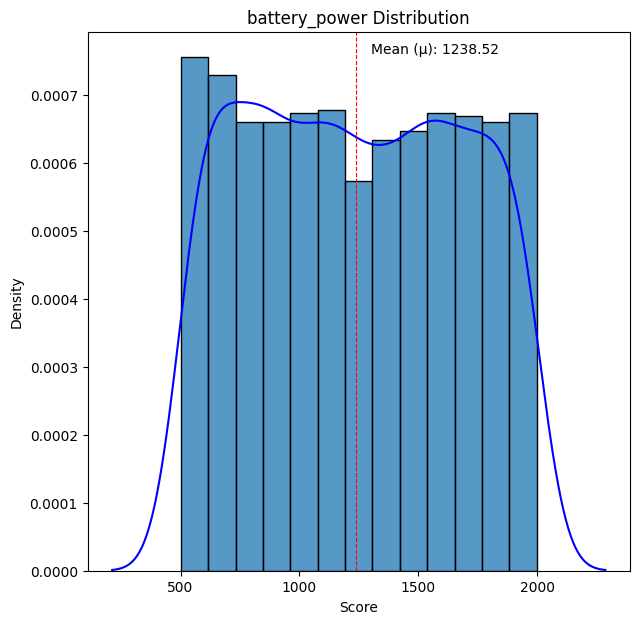

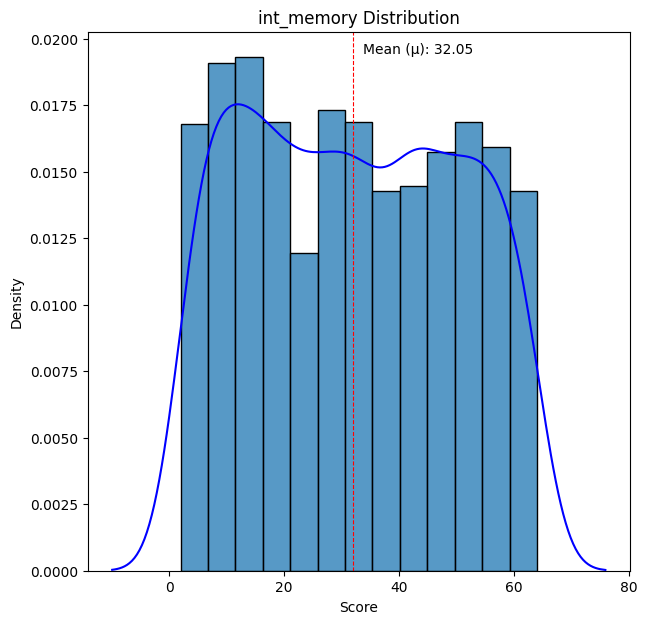

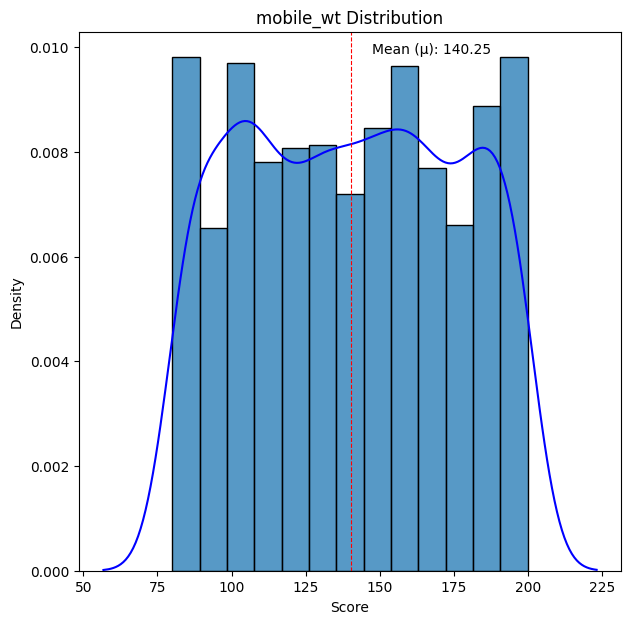

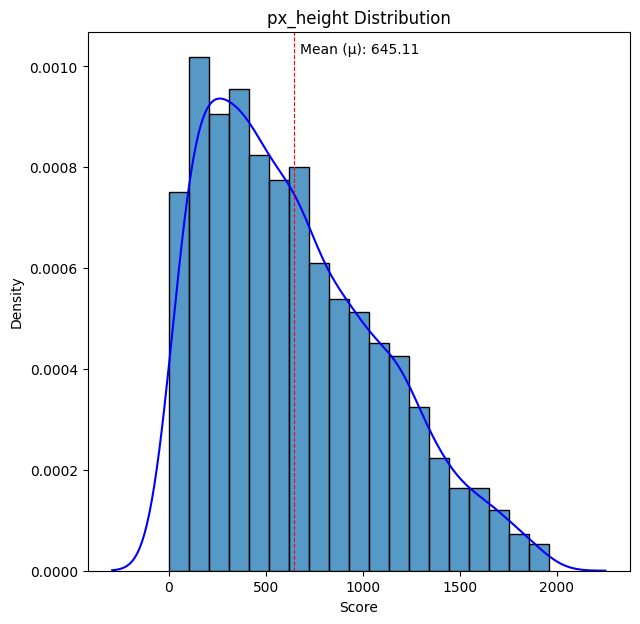

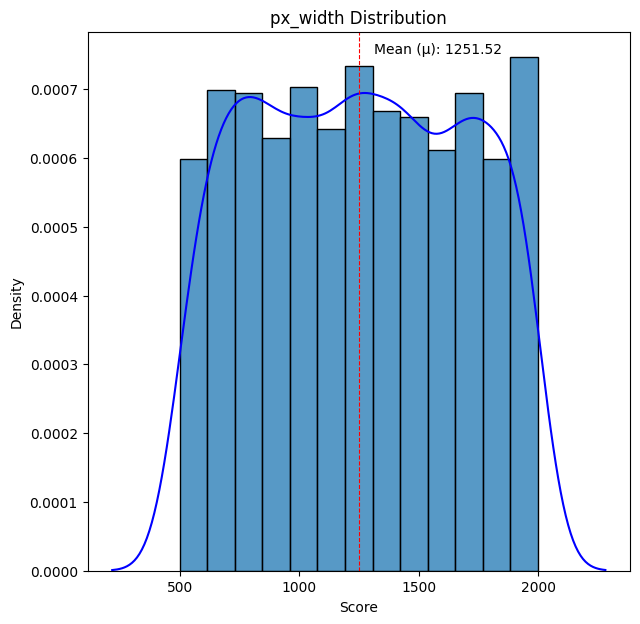

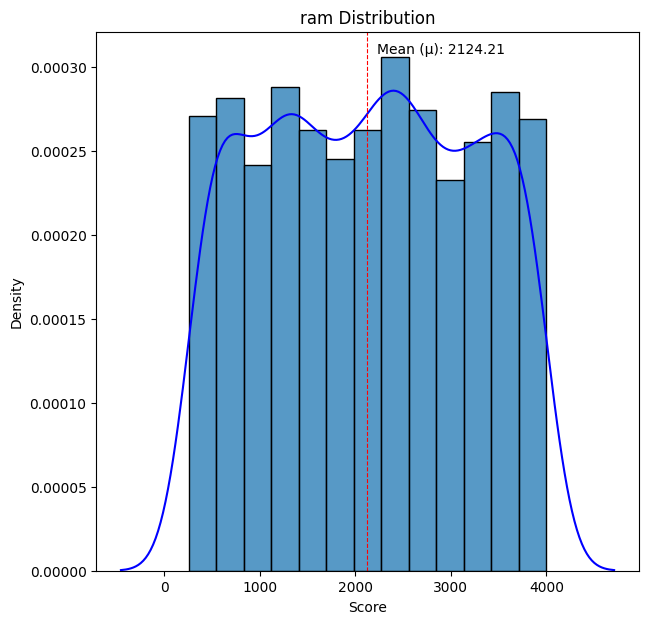

In [ ]:
for column_name in num_features:
  plt.figure(figsize=(7, 7))
  plt.title("{column_name} Distribution".format(column_name = column_name))
  sns.histplot(df[column_name], stat='density')
  sns.kdeplot(df[column_name], color='blue')
  plt.axvline(df[column_name].mean(), color='red', linestyle='--', linewidth=0.8)
  min_ylim, max_ylim = plt.ylim()
  plt.text(df[column_name].mean()*1.05, max_ylim*0.96, 'Mean (μ): {:.2f}'.format(df[column_name].mean()))
  plt.xlabel("Score")
  plt.ylabel("Density")
  plt.show()

# Separarea Caracteristicilor și a Variabilei Țintă din Setul de Date

In [ ]:
y = df['price_range']
X = df.drop('price_range', axis = 1)

# Împărțirea Setului de Date în Seturi de Antrenament și Testare + Reducerea Dimensiunii Setului de Date utilizând PCA

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.25)

In [ ]:
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)

# Logistic Regression

## Logistic Regression date originale

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

accuracy_lr = metrics.accuracy_score(y_test, y_pred_lr)
print(f"Acuratețe Logistic Regression (date originale): {accuracy_lr}")

Acuratețe Logistic Regression (date originale): 0.618


## Logistic Regression date reduse

In [ ]:
lr_reduced = LogisticRegression()
lr_reduced.fit(X_train_reduced, y_train)
y_pred_lr_reduced = lr_reduced.predict(X_test_reduced)

# Calcularea acurateței
accuracy_lr_reduced = accuracy_score(y_test, y_pred_lr_reduced)
print(f"Acuratețe Logistic Regression (date reduse): {accuracy_lr_reduced}")


Acuratețe Logistic Regression (date reduse): 0.802


## Compararea atat a matricei de confuzie, cat si a acuratetei intre setul de date original si cel redus

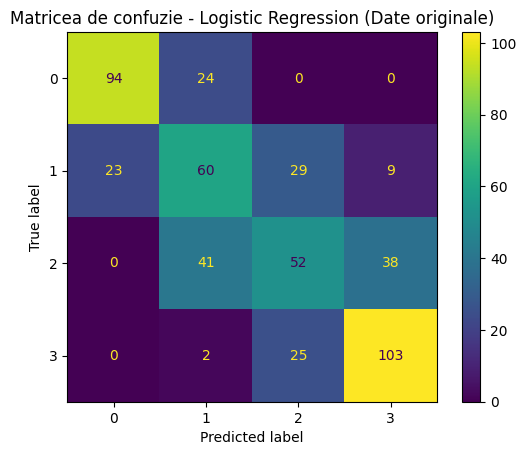

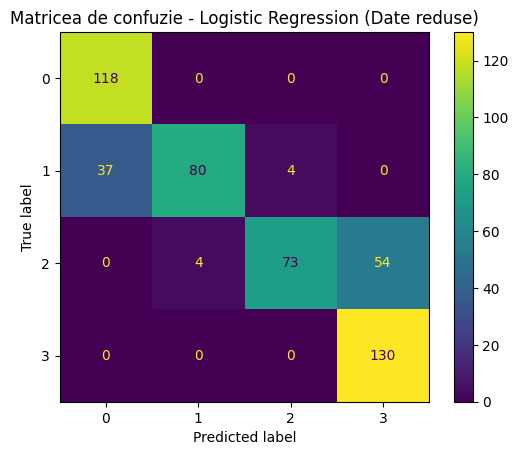

In [ ]:
cm_lr_original = confusion_matrix(y_test, y_pred_lr)

# Afișarea matricei de confuzie
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_lr_original, display_labels=lr.classes_)
disp_original.plot()
plt.title("Matricea de confuzie - Logistic Regression (Date originale)")
plt.show()

cm_lr_original_reduced = confusion_matrix(y_test, y_pred_lr_reduced)

# Afișarea matricei de confuzie
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_lr_original_reduced, display_labels=lr.classes_)
disp_original.plot()
plt.title("Matricea de confuzie - Logistic Regression (Date reduse)")
plt.show()

In [ ]:
print(f"Acuratețe Logistic Regression (date originale): {accuracy_lr}")
print(f"Acuratețe Logistic Regression (date reduse): {accuracy_lr_reduced}")

Acuratețe Logistic Regression (date originale): 0.618
Acuratețe Logistic Regression (date reduse): 0.802


# Random Forest

## Random Forest date originale

In [ ]:
rc = RandomForestClassifier()
rc.fit(X_train,y_train)
y_pred_rc = rc.predict(X_test)

accuracy_rc = metrics.accuracy_score(y_test, y_pred_rc)
print(f"Acuratețe Random Forest (date originale): {accuracy_rc}")

print("\nEvaluarea pe date originale:")
for n in [10, 50, 100, 200, 300]:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, X_train, y_train, cv=5)
    print(f"n_estimators={n}, Acuratețea medie: {scores.mean()}")

Acuratețe Random Forest (date originale): 0.852
Evaluarea pe date originale:
n_estimators=10, Acuratețea medie: 0.8126666666666666
n_estimators=50, Acuratețea medie: 0.8566666666666667
n_estimators=100, Acuratețea medie: 0.8673333333333334
n_estimators=200, Acuratețea medie: 0.8746666666666666
n_estimators=300, Acuratețea medie: 0.8713333333333335


## Random Forest date reduse

In [ ]:
rc_reduced = RandomForestClassifier()
rc_reduced.fit(X_train_reduced, y_train)
y_pred_rc_reduced = rc_reduced.predict(X_test_reduced)

accuracy_rc_reduced = metrics.accuracy_score(y_test, y_pred_rc_reduced)
print(f"Acuratețe Random Forest (date originale): {accuracy_rc_reduced}")

print("\nEvaluarea pe date reduse:")
for n in [10, 50, 100, 200, 300]:
    rf = RandomForestClassifier(n_estimators=n)
    scores = cross_val_score(rf, X_train_reduced, y_train, cv=5)
    print(f"n_estimators={n}, Acuratețea medie: {scores.mean()}")

Acuratețe Random Forest (date originale): 0.91

Evaluarea pe date reduse:
n_estimators=10, Acuratețea medie: 0.8986666666666666
n_estimators=50, Acuratețea medie: 0.9213333333333333
n_estimators=100, Acuratețea medie: 0.9186666666666665
n_estimators=200, Acuratețea medie: 0.9213333333333333
n_estimators=300, Acuratețea medie: 0.9226666666666666


## Compararea atat a matricei de confuzie, cat si a acuratetei intre setul de date original si cel redus

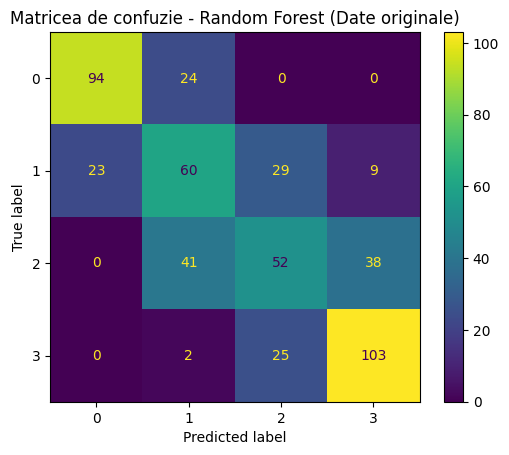

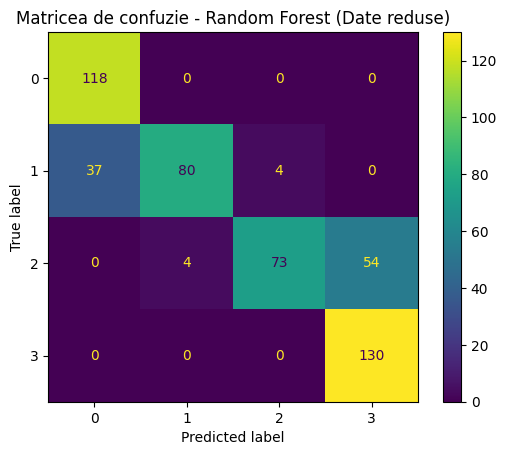

In [ ]:
cm_rc_original = confusion_matrix(y_test, y_pred_rc)

# Afișarea matricei de confuzie
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_lr_original, display_labels=lr.classes_)
disp_original.plot()
plt.title("Matricea de confuzie - Random Forest (Date originale)")
plt.show()

cm_rc_original_reduced = confusion_matrix(y_test, y_pred_rc_reduced)

# Afișarea matricei de confuzie
disp_original = ConfusionMatrixDisplay(confusion_matrix=cm_lr_original_reduced, display_labels=lr.classes_)
disp_original.plot()
plt.title("Matricea de confuzie - Random Forest (Date reduse)")
plt.show()

In [ ]:
print(f"Acuratețe Logistic Regression (date originale): {accuracy_rc}")
print(f"Acuratețe Logistic Regression (date reduse): {accuracy_rc_reduced}")

Acuratețe Logistic Regression (date originale): 0.852
Acuratețe Logistic Regression (date reduse): 0.91


# KNN

## KNN date originale

In [ ]:
knn_original = KNeighborsClassifier(n_neighbors=5)

knn_original.fit(X_train, y_train)
y_pred_knn_original = knn_original.predict(X_test)

accuracy_knn_original = accuracy_score(y_test, y_pred_knn_original)
print(f"Acuratețe KNN (date originale): {accuracy_knn_original}")

Acuratețe KNN (date originale): 0.922


## KNN date reduse

In [ ]:
knn_reduced = KNeighborsClassifier(n_neighbors=5)
knn_reduced.fit(X_train_reduced, y_train)
y_pred_knn_reduced = knn_reduced.predict(X_test_reduced)

accuracy_knn_reduced = accuracy_score(y_test, y_pred_knn_reduced)
print(f"Acuratețe KNN (date reduse): {accuracy_knn_reduced}")

Acuratețe KNN (date reduse): 0.916


## Compararea atat a matricei de confuzie, cat si a acuratetei intre setul de date original si cel redus

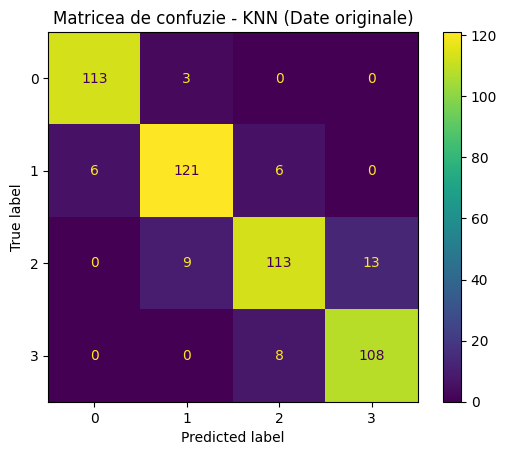

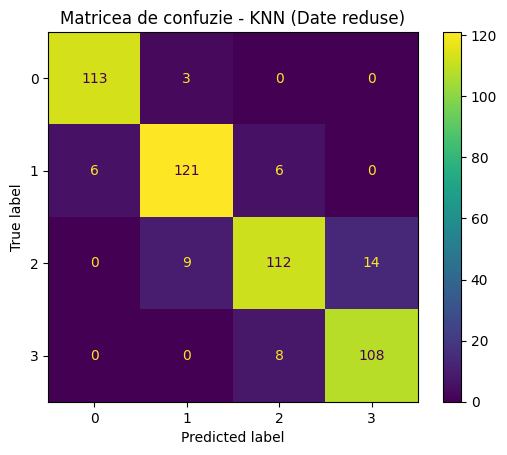

Acuratețe KNN (date originale): 0.91
Acuratețe KNN (date reduse): 0.908


In [ ]:
cm_knn_original = confusion_matrix(y_test, y_pred_knn_original)
disp_knn_original = ConfusionMatrixDisplay(confusion_matrix=cm_knn_original, display_labels=knn_original.classes_)
disp_knn_original.plot()
plt.title("Matricea de confuzie - KNN (Date originale)")
plt.show()

cm_knn_reduced = confusion_matrix(y_test, y_pred_knn_reduced)
disp_knn_reduced = ConfusionMatrixDisplay(confusion_matrix=cm_knn_reduced, display_labels=knn_reduced.classes_)
disp_knn_reduced.plot()
plt.title("Matricea de confuzie - KNN (Date reduse)")
plt.show()

print(f"Acuratețe KNN (date originale): {accuracy_knn_original}")
print(f"Acuratețe KNN (date reduse): {accuracy_knn_reduced}")